## 3. CRISP-DM: Data Understanding

In [5]:

# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display
import re
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from IPython.display import display, Markdown
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


from imblearn.over_sampling import SMOTE 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score, roc_curve, f1_score

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Render high resolution images

# Load datasets
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
weather = pd.read_csv('../data/weather.csv')
spray = pd.read_csv('../data/spray.csv')


### 3.1 Data Description

### 3.2 Attribute Understanding

### 3.3 Data Quality

### 3.4 Data Visualization

##### Abhängigkeit der WNV-Präsenz von Moskitoanzahl und Temperatur

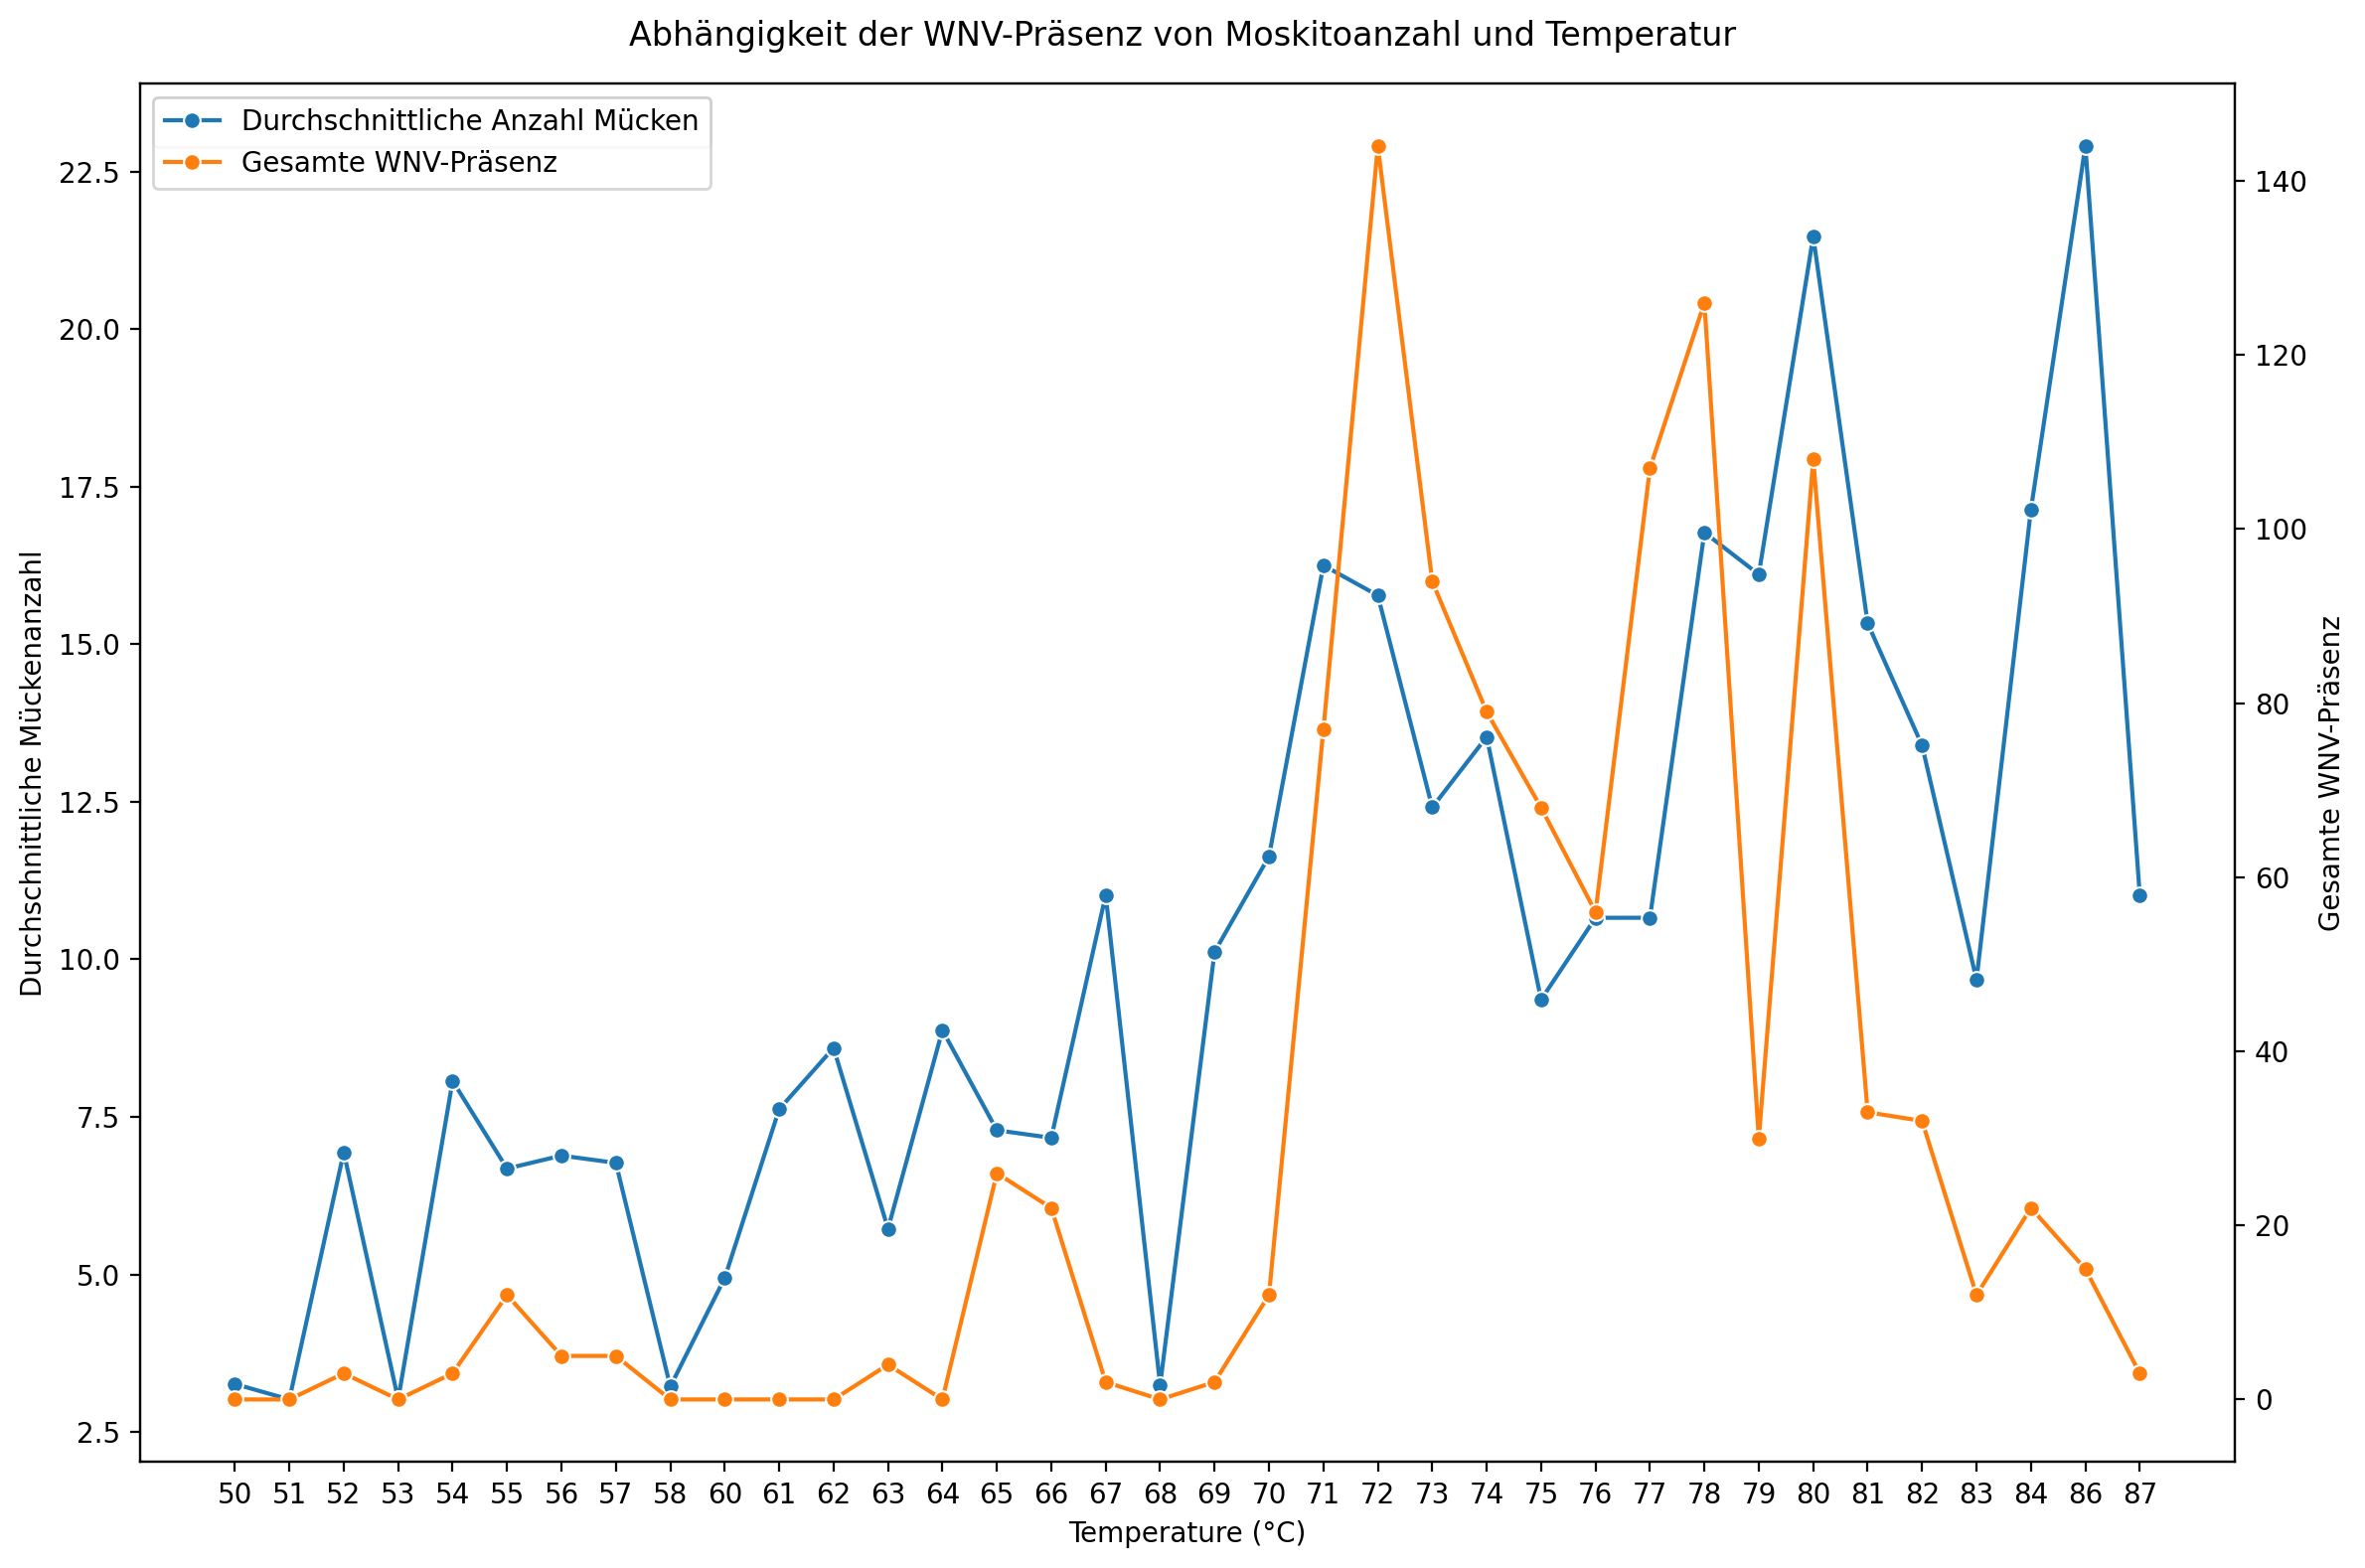

In [25]:
# Dateien einlesen
mosquito_data_path = '../data/train.csv'
weather_data_path = '../data/weather.csv'

# Dataframe erstellen
mosquito_df = pd.read_csv(mosquito_data_path)
weather_df = pd.read_csv(weather_data_path)

# Konvertieren von 'Date' in Datetime-Format
mosquito_df['Date'] = pd.to_datetime(mosquito_df['Date'], format='%Y-%m-%d')
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

if 'Tavg' in weather_df.columns:
    weather_df['Temp'] = weather_df['Tavg']
else:
    # Durchschnittstemperatur berechnen (falls Min/Max-Temperatur vorhanden)
    if 'Tmax' in weather_df.columns and 'Tmin' in weather_df.columns:
        weather_df['Temp'] = (weather_df['Tmax'] + weather_df['Tmin']) / 2
    else:
        raise ValueError("Keine Temperaturdaten gefunden")

# Merge Datensätze auf Basis des Datums
merged_df = pd.merge(mosquito_df, weather_df[['Date', 'Temp']], on='Date')

# Konvertieren von 'NumMosquitos' in Integer
merged_df['NumMosquitos'] = merged_df['NumMosquitos'].astype(int)

# Berechnen des Durchschnitts der Anzahl der Mücken und der WnvPresence für jede Temperatur
avg_values_per_temp = merged_df.groupby('Temp').agg({'NumMosquitos': 'mean', 'WnvPresent': 'sum'}).reset_index()

# Plot erstellen
fig, ax1 = plt.subplots(figsize=(12, 8))

# Durchschnitt Mückenanzahl
color = 'tab:blue'
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Durchschnittliche Mückenanzahl')
sns.lineplot(data=avg_values_per_temp, x='Temp', y='NumMosquitos', marker='o', ax=ax1, color=color, label='Durchschnittliche Anzahl Mücken')
ax1.tick_params(axis='y')

# Zweite Y-Achse für WnvPresence
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Gesamte WNV-Präsenz')
sns.lineplot(data=avg_values_per_temp, x='Temp', y='WnvPresent', marker='o', ax=ax2, color=color, label='Gesamte WNV-Präsenz')
ax2.tick_params(axis='y')

# Titel 
fig.suptitle('Abhängigkeit der WNV-Präsenz von Moskitoanzahl und Temperatur')

# Legenden 
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

fig.tight_layout()
plt.show()

- `train.csv` und `test.csv`: Training und Testdatensätze.

- `weather.csv`: Wetterdaten von 2007 bis 2014.

- `spray.csv`: GIS-Daten von Sprühaktionen in 2011 und 2013.


- `Date`: Datum des Tests.

- `Species`: Mückenart.

- `Trap`: ID der Falle.

- `NumMosquitos`: Anzahl der gefangenen Mücken.

- `WnvPresent`: WNV vorhanden (1: Ja, 0: Nein).

- `Latitude` und `Longitude`: Geografische Koordinaten.